# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [267]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [268]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [269]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [270]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [271]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [272]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [273]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [274]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

In [275]:
model

Linear(in_features=2, out_features=1, bias=False)

In [276]:
model.weight

Parameter containing:
tensor([[-0.6661, -0.1387]], requires_grad=True)

In [277]:
#model.bias # não imprime nada

In [278]:
model2 = torch.nn.Linear(in_features=2, out_features=1, bias=True)

In [279]:
model2

Linear(in_features=2, out_features=1, bias=True)

In [280]:
model2.weight

Parameter containing:
tensor([[-0.3396, -0.1886]], requires_grad=True)

In [281]:
model2.bias

Parameter containing:
tensor([-0.6247], requires_grad=True)

### Verificando a inicialização dos parâmetros

In [282]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

<ipython-input-282-4472ed23bcd1>:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[ 0.0401, -0.0896]], requires_grad=True)

### Testando o predict da rede

In [283]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [284]:
model(Variable(xx))

tensor([[-0.0495],
        [-0.0495],
        [-0.0495],
        [-0.0495],
        [-0.0495]], grad_fn=<MmBackward0>)

## Treinamento

In [285]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/100], loss: 0.023766
Epoch[40/100], loss: 0.021545
Epoch[60/100], loss: 0.021224
Epoch[80/100], loss: 0.021177
Epoch[100/100], loss: 0.021171


## Avaliação

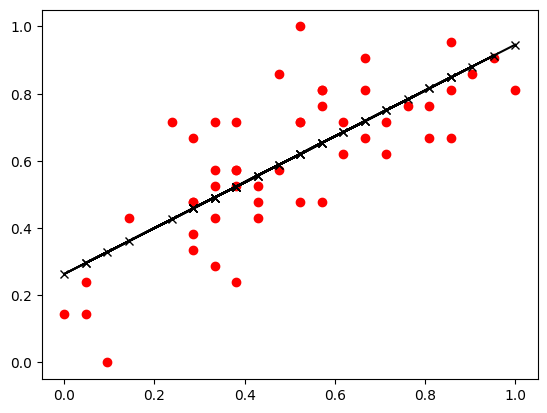

In [286]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [287]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2635, 0.6823]]))])

### Parâmetros ótimos, solução analítica

In [288]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data`? Por que precisa do `data`?

   Para extrair o valor escalar do tensor. Isso é conseguido porque o .data "força" a saída do variable ou tensor.
   

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

In [289]:
# Define a função de perda MSE
loss_fn = torch.nn.MSELoss()

# Faz a predição com os dados de treino
with torch.no_grad():  # Desativa o cálculo de gradientes
    y_pred = model(x_train_bias)  # já está com os pesos treinados

# Calcula a perda
mse = loss_fn(y_pred, y_train)

# Imprime a perda final
print(f"Perda final (MSE) com os pesos treinados: {mse.item():.6f}")

Perda final (MSE) com os pesos treinados: 0.021170


- 3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

In [290]:
w0_list = w1_list = []

torch.manual_seed(1234)
model = torch.nn.Linear(in_features=2, out_features=1, bias=False)
num_epochs = 100
learning_rate = 0.5
w0_list.append(model.weight.data[0][0])
w1_list.append(model.weight.data[0][1])

for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    w0_list.append(model.weight.data[0][0])
    w1_list.append(model.weight.data[0][1])

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

print("Lista 0:", [f"{w:.6f}" for w in w0_list])
print("Lista 1:", [f"{w:.6f}" for w in w1_list])

Epoch[20/100], loss: 0.021875
Epoch[40/100], loss: 0.021272
Epoch[60/100], loss: 0.021184
Epoch[80/100], loss: 0.021172
Epoch[100/100], loss: 0.021170
Lista 0: ['-0.666124', '-0.138736', '0.668443', '0.568508', '0.319536', '0.403365', '0.401007', '0.460319', '0.372909', '0.459847', '0.373142', '0.473380', '0.366466', '0.482703', '0.361867', '0.492498', '0.357034', '0.501599', '0.352545', '0.510330', '0.348237', '0.518634', '0.344141', '0.526550', '0.340236', '0.534092', '0.336515', '0.541278', '0.332970', '0.548125', '0.329592', '0.554650', '0.326373', '0.560867', '0.323306', '0.566790', '0.320384', '0.572434', '0.317599', '0.577812', '0.314946', '0.582937', '0.312418', '0.587820', '0.310009', '0.592472', '0.307714', '0.596905', '0.305527', '0.601129', '0.303443', '0.605154', '0.301457', '0.608989', '0.299566', '0.612643', '0.297763', '0.616125', '0.296045', '0.619442', '0.294409', '0.622603', '0.292849', '0.625615', '0.291363', '0.628485', '0.289947', '0.631220', '0.288598', '0.633826

## Ploting vectors

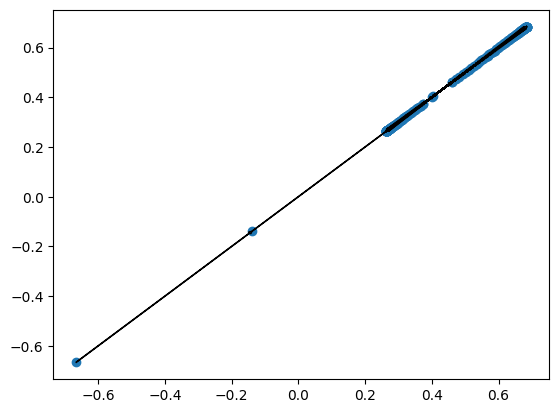

In [291]:
# Exemplo
# w0_list = [0.1, 0.15, 0.2, 0.3]
# w1_list = [0.1, 0.2, 0.18, 0.3]
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

# Aprendizados

Apesar de ainda estar confusa com muitos detalhes técnicos, esse exercício me deu uma visão mais holística do processo de aprendizado de máquina e de como a biblioteca é usada para resolver problemas reais.

Este foi o primeiro exercício em que pude ver de forma integrada os principais elementos de uma solução de aprendizado supervisionado com o PyTorch.

Quando rodamos o modelo com dados de teste mas com os pesos ótimos, nosso MSE deu baixo e muito semelhante ao do treinamento o que é importante pois o modelo foi ajustado justamente para minimizar esse erro.